http://www.menpo.org/menpofit/atm.html

In [81]:
from pathlib import Path
import menpo.io as mio

path_to_lfpw = Path('/home/rshaydu/tensorfaces/lfpw/trainset/')

image = mio.import_image(path_to_lfpw / 'image_0002.png')
image = image.crop_to_landmarks_proportion(0.5)

template = mio.import_image(path_to_lfpw / 'image_0005.png')
template = template.crop_to_landmarks_proportion(0.5)


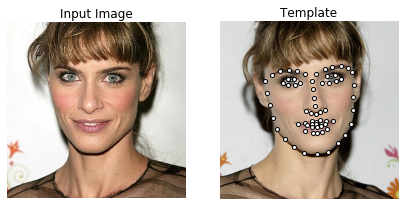

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(121)
image.view()
plt.gca().set_title('Input Image')

plt.subplot(122)
template.view_landmarks(marker_face_colour='white', marker_edge_colour='black',
                        marker_size=4)
plt.gca().set_title('Template');


In [83]:
from menpo.visualize import print_progress

training_shapes = []
for lg in print_progress(mio.import_landmark_files(path_to_lfpw / '*.pts', verbose=True)):
    training_shapes.append(lg)


Found 811 assets, index the returned LazyList to import.
[====================] 100% (811/811) - done.                                   


In [84]:
from menpofit.atm import HolisticATM
from menpo.feature import igo
from menpofit.transform import DifferentiableThinPlateSplines

atm = HolisticATM(template, training_shapes, group='PTS',
                  diagonal=180, scales=(0.25, 1.0),
                  holistic_features=igo, verbose=True, transform=DifferentiableThinPlateSplines)


- Computing reference shape                                                     Computing batch 0
- Building models
  - Scale 0: Doneing images: [==========] 100% (1/1) - done.                    ng
  - Scale 1: Building shape model                                               

/home/rshaydu/.conda/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


  - Scale 1: Doneing images: [==========] 100% (1/1) - done.                    
                                                              

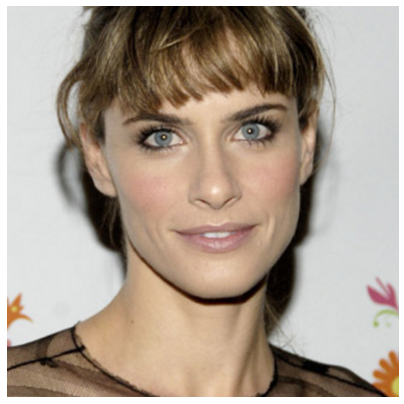

In [85]:
template.view()

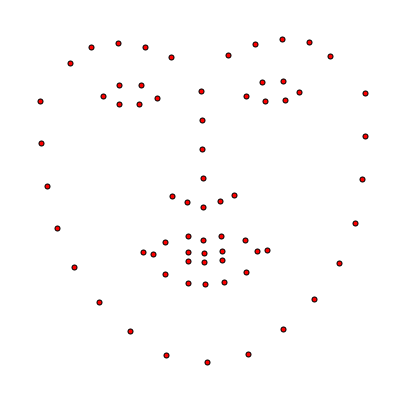

In [86]:
atm.view_shape_models_widget()



/home/rshaydu/.conda/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


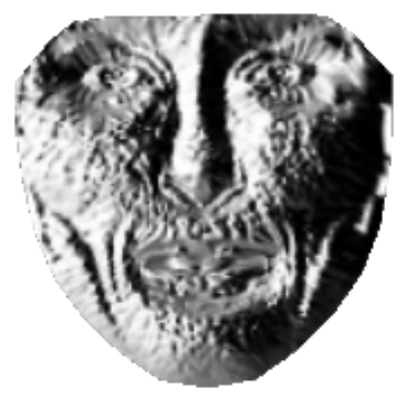

In [87]:
atm.view_atm_widget()

In [88]:
from menpofit.atm import LucasKanadeATMFitter, InverseCompositional

fitter = LucasKanadeATMFitter(atm,
                              lk_algorithm_cls=InverseCompositional, n_shape=[5, 15])


In [89]:
print(fitter)

Holistic Active Template Model
 - Images warped with DifferentiableThinPlateSplines transform
 - Images scaled to diagonal: 180.00
 - Scales: [0.25, 1.0]
   - Scale 0.25
     - Holistic feature: igo
     - Template shape: (38, 38)
     - Shape model class: OrthoPDM
       - 132 shape components
       - 4 similarity transform parameters
   - Scale 1.0
     - Holistic feature: igo
     - Template shape: (133, 134)
     - Shape model class: OrthoPDM
       - 132 shape components
       - 4 similarity transform parameters
Inverse Compositional Algorithm
 - Scales: [0.25, 1.0]
   - Scale 0.25
     - 5 active shape components
     - 4 similarity transform components
   - Scale 1.0
     - 15 active shape components
     - 4 similarity transform components
    


1 detected faces.


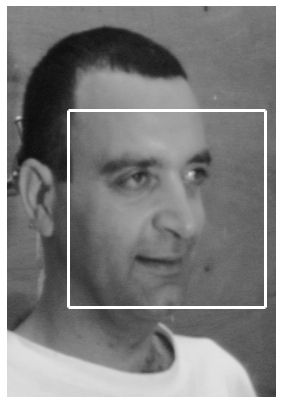

In [90]:
from menpodetect import load_dlib_frontal_face_detector

# Load detector
detect = load_dlib_frontal_face_detector()

image = mio.import_image('/home/rshaydu/tensorfaces/FaceBase_png/amir-vp0-il1-ex2.png')

# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='white',
                         render_markers=False, line_width=3);


In [92]:
# initial bbox
initial_bbox = bboxes[0]

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=200)

# print result
print(result)


Fitting result of 68 landmark points.


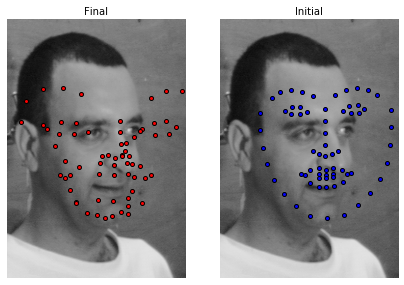

In [93]:
result.view(render_initial_shape=True)

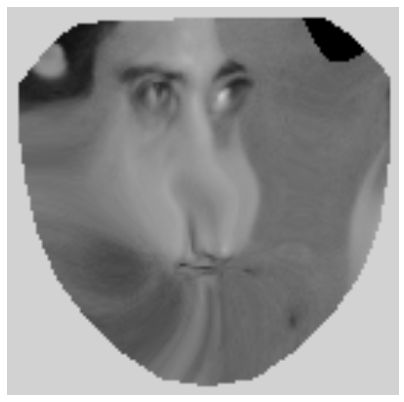

In [94]:
from menpofit.transform import DifferentiablePiecewiseAffine

warped = fitter.warped_images(result.image, [result.final_shape])
warped[0].view()